In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["figure.figsize"] = (15,7)

In [3]:
HR_DF = pd.read_csv('/Users/apple/Downloads/HR_comma_sep.csv')

In [5]:
HR_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<AxesSubplot:>

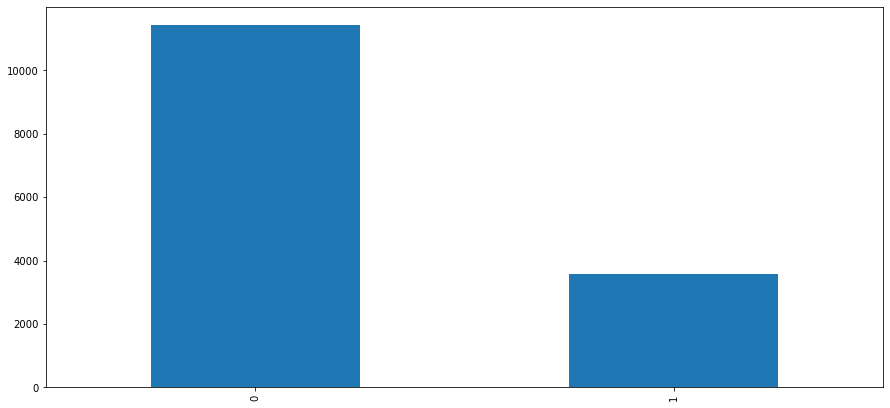

In [15]:
HR_DF.left.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='salary'>

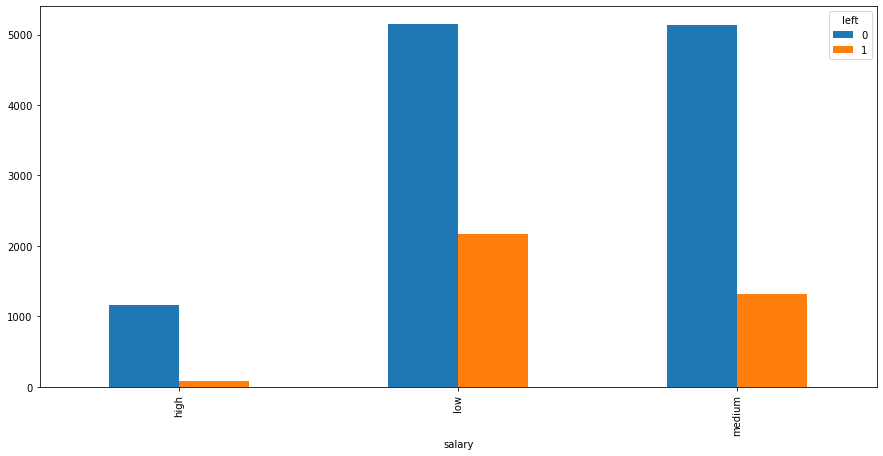

In [16]:
pd.crosstab(HR_DF.salary,HR_DF.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

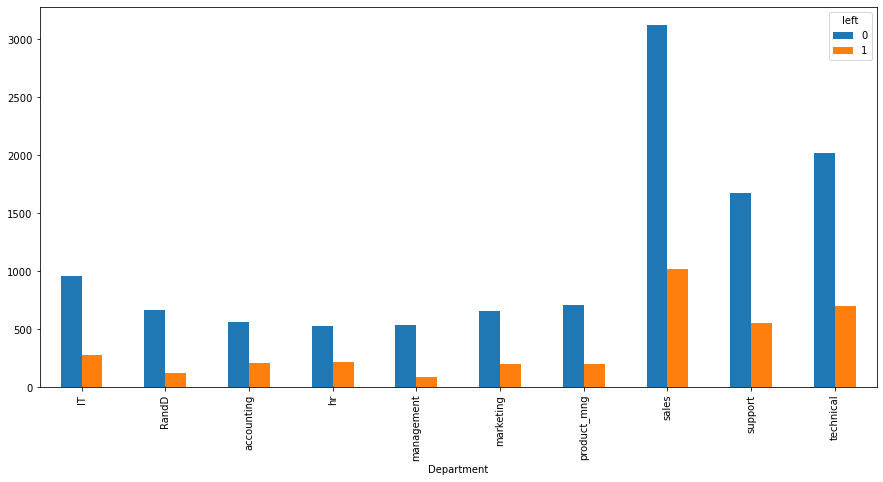

In [17]:
pd.crosstab(HR_DF.Department,HR_DF.left).plot(kind='bar')

In [19]:
pd.pivot_table(HR_DF, index = 'salary', values = 'left')

,left
salary,
high,0.066289
low,0.296884
medium,0.204313


<AxesSubplot:xlabel='salary'>

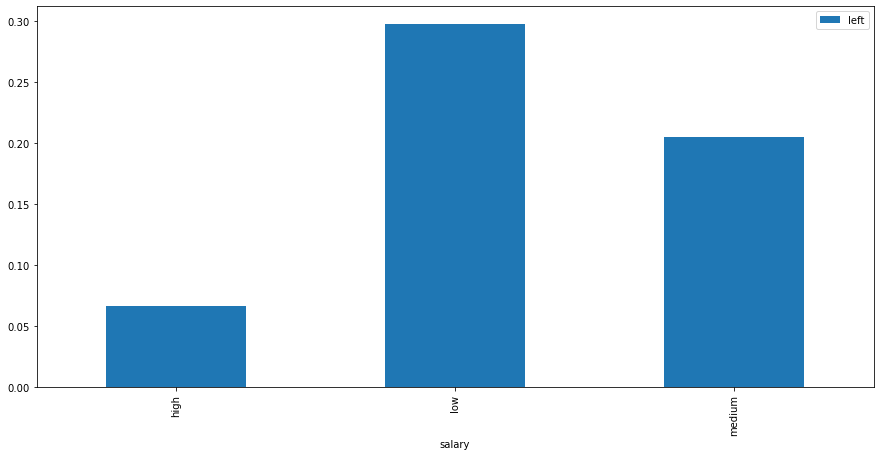

In [25]:
pd.pivot_table(HR_DF, index = ['salary'], values = 'left').plot(kind = 'bar')

In [28]:
HR_DF.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [29]:
subdf = HR_DF[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [30]:
dummies = pd.get_dummies(subdf.salary)

In [31]:
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [32]:
dummies_new = pd.concat([subdf,dummies],axis = 'columns')

In [34]:
dummies_new = dummies_new.drop(['salary'],axis = 'columns')

In [36]:
X = dummies_new

In [37]:
y = HR_DF.left

In [38]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [42]:
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [44]:
model.score(X_test,y_test)

0.7750476190476191